<a href="https://colab.research.google.com/github/lonsst/ML_practice/blob/main/ML_4_1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Шаг 1: Загрузка и чтение датасета
url = "https://raw.githubusercontent.com/narendramall/Predicting_Price_of_Pre_Owned_Cars/master/cars_sampled.csv"
df = pd.read_csv(url)

In [ ]:
# Шаг 2: Описательная статистика
print("Размер датасета:", df.shape)
print("\nТипы переменных:\n", df.dtypes)
print("\nПустые значения:\n", df.isnull().sum())
print("\nУникальные значения:\n", df.nunique())

Размер датасета: (50001, 19)

Типы переменных:
 dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

Пустые значения:
 dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegist

In [ ]:
# Шаг 3: Перевод числовых значений в формат int
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].astype(int)

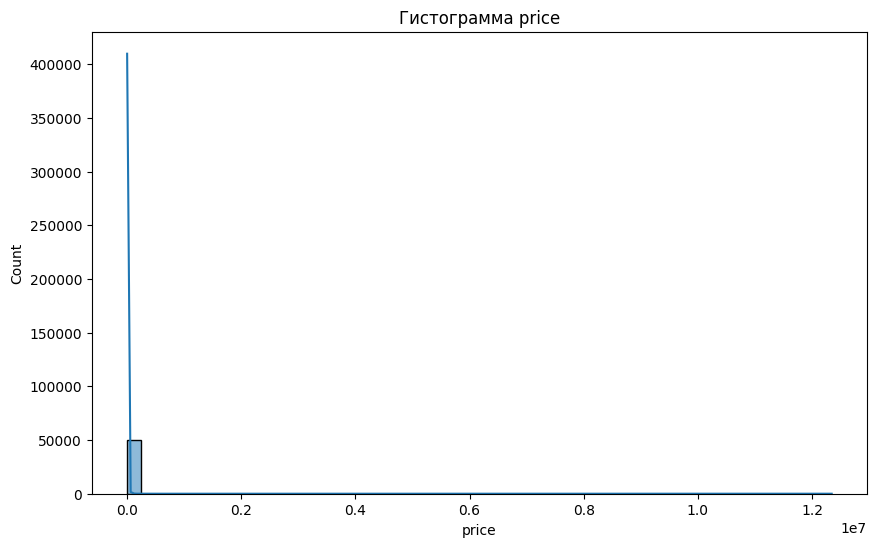

In [ ]:
# Шаг 4: Работа с столбцом price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Гистограмма price')
plt.show()

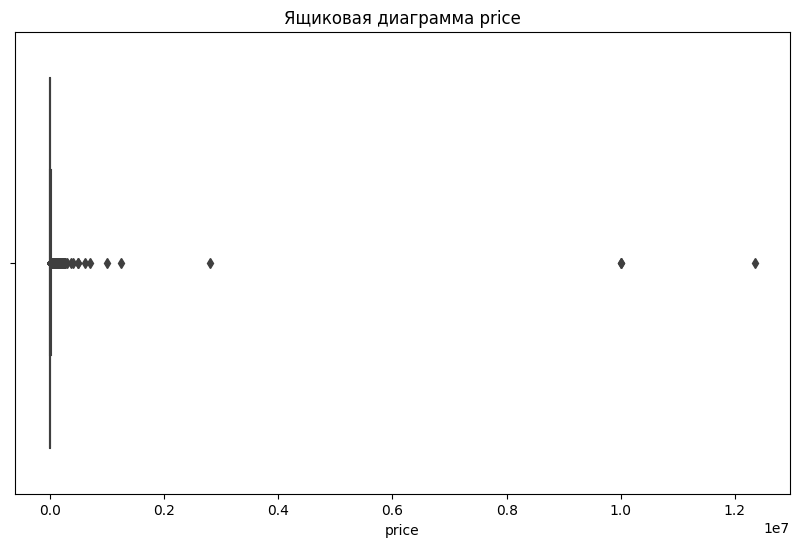

In [ ]:
# Ящиковая диаграмма для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Ящиковая диаграмма price')
plt.show()

In [ ]:
# Фильтрация аномальных значений
df = df[(df['price'] > 100) & (df['price'] < 100000)]

<ipython-input-17-7b7151651283>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


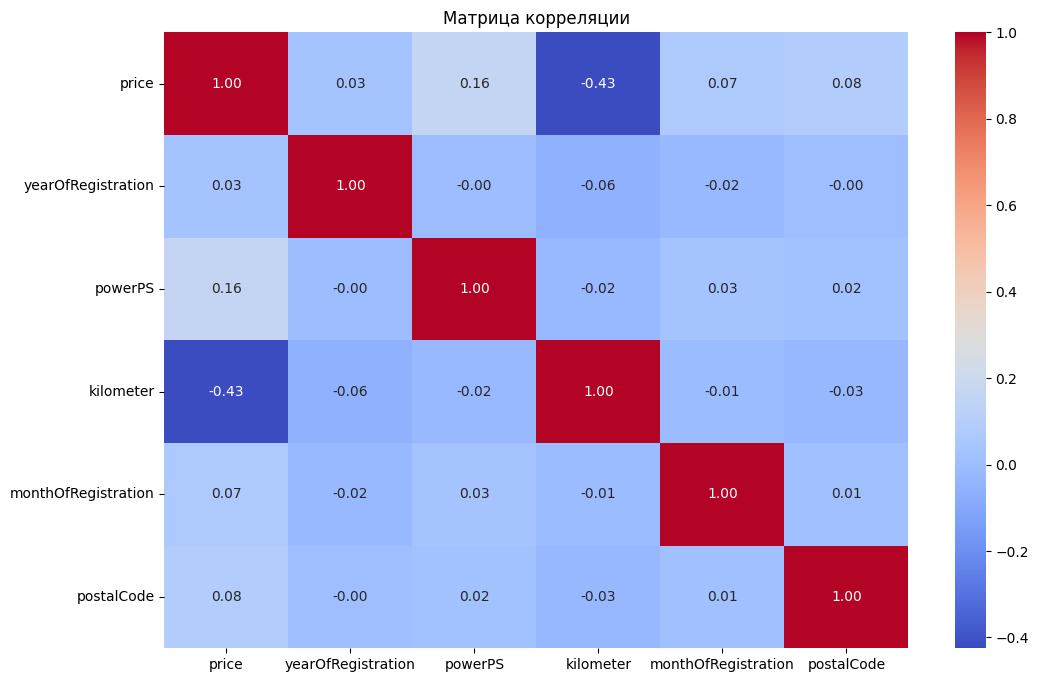

In [ ]:
# Шаг 5: Работа с другими параметрами и коэффициент корреляции
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

<Axes: xlabel='notRepairedDamage', ylabel='price'>

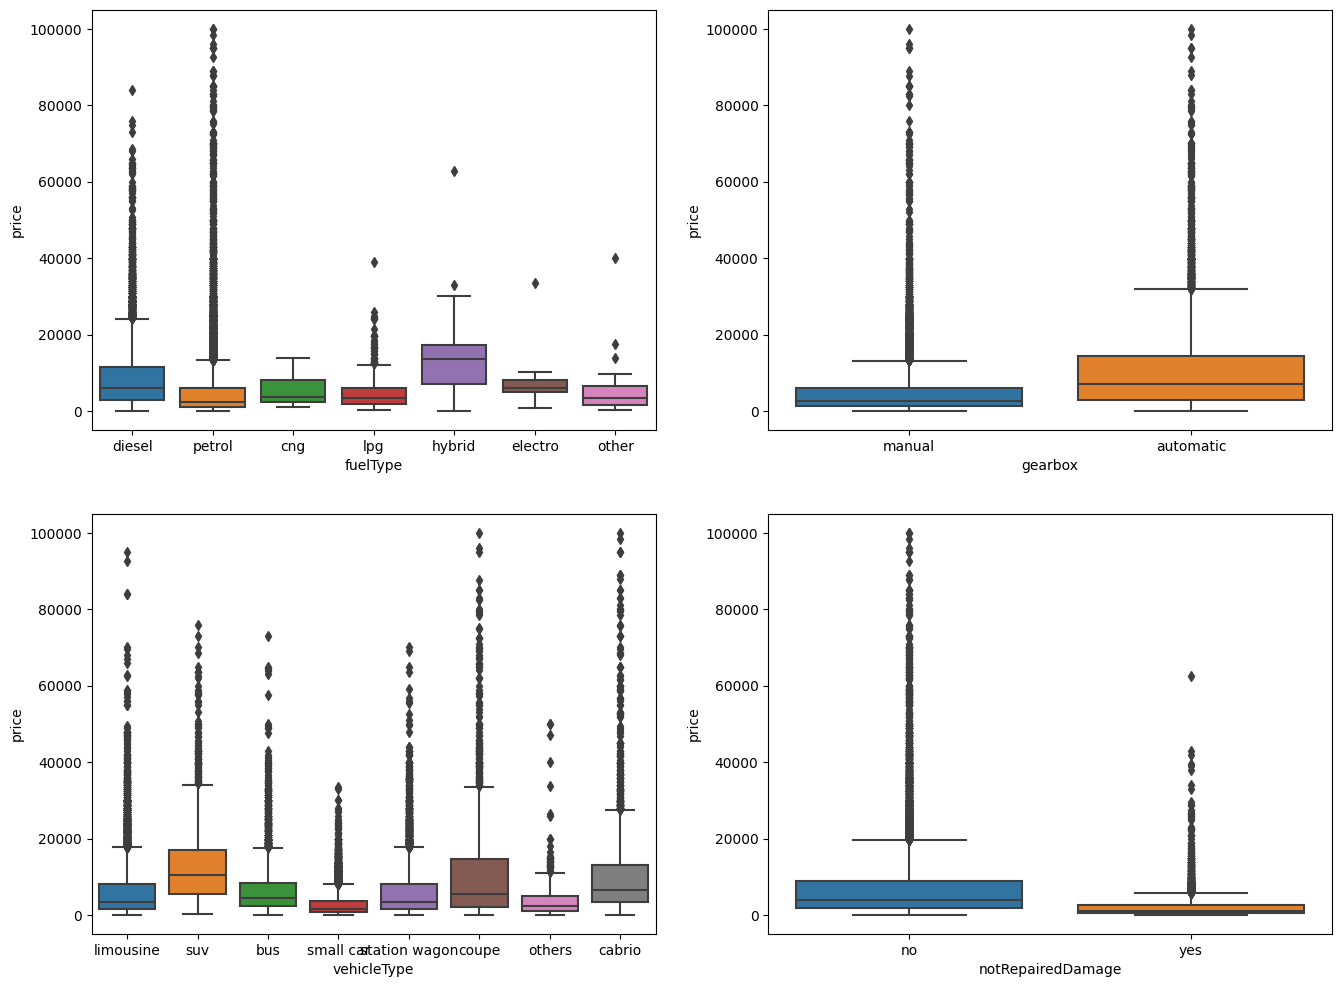

In [ ]:
# Шаг 6: Ящиковые диаграммы зависимости от price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.boxplot(x='fuelType', y='price', data=df, ax=axes[0, 0])
sns.boxplot(x='gearbox', y='price', data=df, ax=axes[0, 1])
sns.boxplot(x='vehicleType', y='price', data=df, ax=axes[1, 0])
sns.boxplot(x='notRepairedDamage', y='price', data=df, ax=axes[1, 1])

In [ ]:
# Шаг 7: Обработка пропусков
# Удаление столбцов с большим количеством пропусков
threshold = 0.8  # порог 80% пропусков
df = df.dropna(thresh=threshold * len(df), axis=1)

In [ ]:
# Шаг 8: Сохранение датасета
df.to_csv("processed_car_data.csv", index=False)